In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle

In [3]:
train_filename = 'trainsetpngResampled10000.tar.gz'
test_filename = 'trainsetpngResampled100.tar.gz'

In [4]:
# extracting the datasets
num_classes = 256
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

trainsetpngResampled10000 already present - Skipping extraction of trainsetpngResampled10000.tar.gz.
['trainsetpngResampled10000/0', 'trainsetpngResampled10000/1', 'trainsetpngResampled10000/10', 'trainsetpngResampled10000/100', 'trainsetpngResampled10000/101', 'trainsetpngResampled10000/102', 'trainsetpngResampled10000/103', 'trainsetpngResampled10000/104', 'trainsetpngResampled10000/105', 'trainsetpngResampled10000/106', 'trainsetpngResampled10000/107', 'trainsetpngResampled10000/108', 'trainsetpngResampled10000/109', 'trainsetpngResampled10000/11', 'trainsetpngResampled10000/110', 'trainsetpngResampled10000/111', 'trainsetpngResampled10000/112', 'trainsetpngResampled10000/113', 'trainsetpngResampled10000/114', 'trainsetpngResampled10000/115', 'trainsetpngResampled10000/116', 'trainsetpngResampled10000/117', 'trainsetpngResampled10000/118', 'trainsetpngResampled10000/119', 'trainsetpngResampled10000/12', 'trainsetpngResampled10000/120', 'trainsetpngResampled10000/121', 'trainsetpngRe

In [5]:
# have a look at data
import random
import hashlib

def disp_samples(data_folders, sample_size):
  for folder in data_folders:
    print(folder)
    image_files = os.listdir(folder)
    image_sample = random.sample(image_files, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

In [5]:
disp_samples(train_folders, 1)

trainsetpngResampled10000/0


trainsetpngResampled10000/1


trainsetpngResampled10000/10


trainsetpngResampled10000/100


trainsetpngResampled10000/101


trainsetpngResampled10000/102


trainsetpngResampled10000/103


trainsetpngResampled10000/104


trainsetpngResampled10000/105


trainsetpngResampled10000/106


trainsetpngResampled10000/107


trainsetpngResampled10000/108


trainsetpngResampled10000/109


trainsetpngResampled10000/11


trainsetpngResampled10000/110


trainsetpngResampled10000/111


trainsetpngResampled10000/112


trainsetpngResampled10000/113


trainsetpngResampled10000/114


trainsetpngResampled10000/115


trainsetpngResampled10000/116


trainsetpngResampled10000/117


trainsetpngResampled10000/118


trainsetpngResampled10000/119


trainsetpngResampled10000/12


trainsetpngResampled10000/120


trainsetpngResampled10000/121


trainsetpngResampled10000/122


trainsetpngResampled10000/123


trainsetpngResampled10000/124


trainsetpngResampled10000/125


trainsetpngResampled10000/126


trainsetpngResampled10000/127


trainsetpngResampled10000/128


trainsetpngResampled10000/129


trainsetpngResampled10000/13


trainsetpngResampled10000/130


trainsetpngResampled10000/131


trainsetpngResampled10000/132


trainsetpngResampled10000/133


trainsetpngResampled10000/134


trainsetpngResampled10000/135


trainsetpngResampled10000/136


trainsetpngResampled10000/137


trainsetpngResampled10000/138


trainsetpngResampled10000/139


trainsetpngResampled10000/14


trainsetpngResampled10000/140


trainsetpngResampled10000/141


trainsetpngResampled10000/142


trainsetpngResampled10000/143


trainsetpngResampled10000/144


trainsetpngResampled10000/145


trainsetpngResampled10000/146


trainsetpngResampled10000/147


trainsetpngResampled10000/148


trainsetpngResampled10000/149


trainsetpngResampled10000/15


trainsetpngResampled10000/150


trainsetpngResampled10000/151


trainsetpngResampled10000/152


trainsetpngResampled10000/153


trainsetpngResampled10000/154


trainsetpngResampled10000/155


trainsetpngResampled10000/156


trainsetpngResampled10000/157


trainsetpngResampled10000/158


trainsetpngResampled10000/159


trainsetpngResampled10000/16


trainsetpngResampled10000/160


trainsetpngResampled10000/161


trainsetpngResampled10000/162


trainsetpngResampled10000/163


trainsetpngResampled10000/164


trainsetpngResampled10000/165


trainsetpngResampled10000/166


trainsetpngResampled10000/167


trainsetpngResampled10000/168


trainsetpngResampled10000/169


trainsetpngResampled10000/17


trainsetpngResampled10000/170


trainsetpngResampled10000/171


trainsetpngResampled10000/172


trainsetpngResampled10000/173


trainsetpngResampled10000/174


trainsetpngResampled10000/175


trainsetpngResampled10000/176


trainsetpngResampled10000/177


trainsetpngResampled10000/178


trainsetpngResampled10000/179


trainsetpngResampled10000/18


trainsetpngResampled10000/180


trainsetpngResampled10000/181


trainsetpngResampled10000/182


trainsetpngResampled10000/183


trainsetpngResampled10000/184


trainsetpngResampled10000/185


trainsetpngResampled10000/186


trainsetpngResampled10000/187


trainsetpngResampled10000/188


trainsetpngResampled10000/189


trainsetpngResampled10000/19


trainsetpngResampled10000/190


trainsetpngResampled10000/191


trainsetpngResampled10000/192


trainsetpngResampled10000/193


trainsetpngResampled10000/194


trainsetpngResampled10000/195


trainsetpngResampled10000/196


trainsetpngResampled10000/197


trainsetpngResampled10000/198


trainsetpngResampled10000/199


trainsetpngResampled10000/2


trainsetpngResampled10000/20


trainsetpngResampled10000/200


trainsetpngResampled10000/201


trainsetpngResampled10000/202


trainsetpngResampled10000/203


trainsetpngResampled10000/204


trainsetpngResampled10000/205


trainsetpngResampled10000/206


trainsetpngResampled10000/207


trainsetpngResampled10000/208


trainsetpngResampled10000/209


trainsetpngResampled10000/21


trainsetpngResampled10000/210


trainsetpngResampled10000/211


trainsetpngResampled10000/212


trainsetpngResampled10000/213


trainsetpngResampled10000/214


trainsetpngResampled10000/215


trainsetpngResampled10000/216


trainsetpngResampled10000/217


trainsetpngResampled10000/218


trainsetpngResampled10000/219


trainsetpngResampled10000/22


trainsetpngResampled10000/220


trainsetpngResampled10000/221


trainsetpngResampled10000/222


trainsetpngResampled10000/223


trainsetpngResampled10000/224


trainsetpngResampled10000/225


trainsetpngResampled10000/226


trainsetpngResampled10000/227


trainsetpngResampled10000/228


trainsetpngResampled10000/229


trainsetpngResampled10000/23


trainsetpngResampled10000/230


trainsetpngResampled10000/231


trainsetpngResampled10000/232


trainsetpngResampled10000/233


trainsetpngResampled10000/234


trainsetpngResampled10000/235


trainsetpngResampled10000/236


trainsetpngResampled10000/237


trainsetpngResampled10000/238


trainsetpngResampled10000/239


trainsetpngResampled10000/24


trainsetpngResampled10000/240


trainsetpngResampled10000/241


trainsetpngResampled10000/242


trainsetpngResampled10000/243


trainsetpngResampled10000/244


trainsetpngResampled10000/245


trainsetpngResampled10000/246


trainsetpngResampled10000/247


trainsetpngResampled10000/248


trainsetpngResampled10000/249


trainsetpngResampled10000/25


trainsetpngResampled10000/250


trainsetpngResampled10000/251


trainsetpngResampled10000/252


trainsetpngResampled10000/253


trainsetpngResampled10000/254


trainsetpngResampled10000/255


trainsetpngResampled10000/26


trainsetpngResampled10000/27


trainsetpngResampled10000/28


trainsetpngResampled10000/29


trainsetpngResampled10000/3


trainsetpngResampled10000/30


trainsetpngResampled10000/31


trainsetpngResampled10000/32


trainsetpngResampled10000/33


trainsetpngResampled10000/34


trainsetpngResampled10000/35


trainsetpngResampled10000/36


trainsetpngResampled10000/37


trainsetpngResampled10000/38


trainsetpngResampled10000/39


trainsetpngResampled10000/4


trainsetpngResampled10000/40


trainsetpngResampled10000/41


trainsetpngResampled10000/42


trainsetpngResampled10000/43


trainsetpngResampled10000/44


trainsetpngResampled10000/45


trainsetpngResampled10000/46


trainsetpngResampled10000/47


trainsetpngResampled10000/48


trainsetpngResampled10000/49


trainsetpngResampled10000/5


trainsetpngResampled10000/50


trainsetpngResampled10000/51


trainsetpngResampled10000/52


trainsetpngResampled10000/53


trainsetpngResampled10000/54


trainsetpngResampled10000/55


trainsetpngResampled10000/56


trainsetpngResampled10000/57


trainsetpngResampled10000/58


trainsetpngResampled10000/59


trainsetpngResampled10000/6


trainsetpngResampled10000/60


trainsetpngResampled10000/61


trainsetpngResampled10000/62


trainsetpngResampled10000/63


trainsetpngResampled10000/64


trainsetpngResampled10000/65


trainsetpngResampled10000/66


trainsetpngResampled10000/67


trainsetpngResampled10000/68


trainsetpngResampled10000/69


trainsetpngResampled10000/7


trainsetpngResampled10000/70


trainsetpngResampled10000/71


trainsetpngResampled10000/72


trainsetpngResampled10000/73


trainsetpngResampled10000/74


trainsetpngResampled10000/75


trainsetpngResampled10000/76


trainsetpngResampled10000/77


trainsetpngResampled10000/78


trainsetpngResampled10000/79


trainsetpngResampled10000/8


trainsetpngResampled10000/80


trainsetpngResampled10000/81


trainsetpngResampled10000/82


trainsetpngResampled10000/83


trainsetpngResampled10000/84


trainsetpngResampled10000/85


trainsetpngResampled10000/86


trainsetpngResampled10000/87


trainsetpngResampled10000/88


trainsetpngResampled10000/89


trainsetpngResampled10000/9


trainsetpngResampled10000/90


trainsetpngResampled10000/91


trainsetpngResampled10000/92


trainsetpngResampled10000/93


trainsetpngResampled10000/94


trainsetpngResampled10000/95


trainsetpngResampled10000/96


trainsetpngResampled10000/97


trainsetpngResampled10000/98


trainsetpngResampled10000/99


In [6]:
disp_samples(test_folders, 1)

trainsetpngResampled100/0


trainsetpngResampled100/1


trainsetpngResampled100/10


trainsetpngResampled100/100


trainsetpngResampled100/101


trainsetpngResampled100/102


trainsetpngResampled100/103


trainsetpngResampled100/104


trainsetpngResampled100/105


trainsetpngResampled100/106


trainsetpngResampled100/107


trainsetpngResampled100/108


trainsetpngResampled100/109


trainsetpngResampled100/11


trainsetpngResampled100/110


trainsetpngResampled100/111


trainsetpngResampled100/112


trainsetpngResampled100/113


trainsetpngResampled100/114


trainsetpngResampled100/115


trainsetpngResampled100/116


trainsetpngResampled100/117


trainsetpngResampled100/118


trainsetpngResampled100/119


trainsetpngResampled100/12


trainsetpngResampled100/120


trainsetpngResampled100/121


trainsetpngResampled100/122


trainsetpngResampled100/123


trainsetpngResampled100/124


trainsetpngResampled100/125


trainsetpngResampled100/126


trainsetpngResampled100/127


trainsetpngResampled100/128


trainsetpngResampled100/129


trainsetpngResampled100/13


trainsetpngResampled100/130


trainsetpngResampled100/131


trainsetpngResampled100/132


trainsetpngResampled100/133


trainsetpngResampled100/134


trainsetpngResampled100/135


trainsetpngResampled100/136


trainsetpngResampled100/137


trainsetpngResampled100/138


trainsetpngResampled100/139


trainsetpngResampled100/14


trainsetpngResampled100/140


trainsetpngResampled100/141


trainsetpngResampled100/142


trainsetpngResampled100/143


trainsetpngResampled100/144


trainsetpngResampled100/145


trainsetpngResampled100/146


trainsetpngResampled100/147


trainsetpngResampled100/148


trainsetpngResampled100/149


trainsetpngResampled100/15


trainsetpngResampled100/150


trainsetpngResampled100/151


trainsetpngResampled100/152


trainsetpngResampled100/153


trainsetpngResampled100/154


trainsetpngResampled100/155


trainsetpngResampled100/156


trainsetpngResampled100/157


trainsetpngResampled100/158


trainsetpngResampled100/159


trainsetpngResampled100/16


trainsetpngResampled100/160


trainsetpngResampled100/161


trainsetpngResampled100/162


trainsetpngResampled100/163


trainsetpngResampled100/164


trainsetpngResampled100/165


trainsetpngResampled100/166


trainsetpngResampled100/167


trainsetpngResampled100/168


trainsetpngResampled100/169


trainsetpngResampled100/17


trainsetpngResampled100/170


trainsetpngResampled100/171


trainsetpngResampled100/172


trainsetpngResampled100/173


trainsetpngResampled100/174


trainsetpngResampled100/175


trainsetpngResampled100/176


trainsetpngResampled100/177


trainsetpngResampled100/178


trainsetpngResampled100/179


trainsetpngResampled100/18


trainsetpngResampled100/180


trainsetpngResampled100/181


trainsetpngResampled100/182


trainsetpngResampled100/183


trainsetpngResampled100/184


trainsetpngResampled100/185


trainsetpngResampled100/186


trainsetpngResampled100/187


trainsetpngResampled100/188


trainsetpngResampled100/189


trainsetpngResampled100/19


trainsetpngResampled100/190


trainsetpngResampled100/191


trainsetpngResampled100/192


trainsetpngResampled100/193


trainsetpngResampled100/194


trainsetpngResampled100/195


trainsetpngResampled100/196


trainsetpngResampled100/197


trainsetpngResampled100/198


trainsetpngResampled100/199


trainsetpngResampled100/2


trainsetpngResampled100/20


trainsetpngResampled100/200


trainsetpngResampled100/201


trainsetpngResampled100/202


trainsetpngResampled100/203


trainsetpngResampled100/204


trainsetpngResampled100/205


trainsetpngResampled100/206


trainsetpngResampled100/207


trainsetpngResampled100/208


trainsetpngResampled100/209


trainsetpngResampled100/21


trainsetpngResampled100/210


trainsetpngResampled100/211


trainsetpngResampled100/212


trainsetpngResampled100/213


trainsetpngResampled100/214


trainsetpngResampled100/215


trainsetpngResampled100/216


trainsetpngResampled100/217


trainsetpngResampled100/218


trainsetpngResampled100/219


trainsetpngResampled100/22


trainsetpngResampled100/220


trainsetpngResampled100/221


trainsetpngResampled100/222


trainsetpngResampled100/223


trainsetpngResampled100/224


trainsetpngResampled100/225


trainsetpngResampled100/226


trainsetpngResampled100/227


trainsetpngResampled100/228


trainsetpngResampled100/229


trainsetpngResampled100/23


trainsetpngResampled100/230


trainsetpngResampled100/231


trainsetpngResampled100/232


trainsetpngResampled100/233


trainsetpngResampled100/234


trainsetpngResampled100/235


trainsetpngResampled100/236


trainsetpngResampled100/237


trainsetpngResampled100/238


trainsetpngResampled100/239


trainsetpngResampled100/24


trainsetpngResampled100/240


trainsetpngResampled100/241


trainsetpngResampled100/242


trainsetpngResampled100/243


trainsetpngResampled100/244


trainsetpngResampled100/245


trainsetpngResampled100/246


trainsetpngResampled100/247


trainsetpngResampled100/248


trainsetpngResampled100/249


trainsetpngResampled100/25


trainsetpngResampled100/250


trainsetpngResampled100/251


trainsetpngResampled100/252


trainsetpngResampled100/253


trainsetpngResampled100/254


trainsetpngResampled100/255


trainsetpngResampled100/26


trainsetpngResampled100/27


trainsetpngResampled100/28


trainsetpngResampled100/29


trainsetpngResampled100/3


trainsetpngResampled100/30


trainsetpngResampled100/31


trainsetpngResampled100/32


trainsetpngResampled100/33


trainsetpngResampled100/34


trainsetpngResampled100/35


trainsetpngResampled100/36


trainsetpngResampled100/37


trainsetpngResampled100/38


trainsetpngResampled100/39


trainsetpngResampled100/4


trainsetpngResampled100/40


trainsetpngResampled100/41


trainsetpngResampled100/42


trainsetpngResampled100/43


trainsetpngResampled100/44


trainsetpngResampled100/45


trainsetpngResampled100/46


trainsetpngResampled100/47


trainsetpngResampled100/48


trainsetpngResampled100/49


trainsetpngResampled100/5


trainsetpngResampled100/50


trainsetpngResampled100/51


trainsetpngResampled100/52


trainsetpngResampled100/53


trainsetpngResampled100/54


trainsetpngResampled100/55


trainsetpngResampled100/56


trainsetpngResampled100/57


trainsetpngResampled100/58


trainsetpngResampled100/59


trainsetpngResampled100/6


trainsetpngResampled100/60


trainsetpngResampled100/61


trainsetpngResampled100/62


trainsetpngResampled100/63


trainsetpngResampled100/64


trainsetpngResampled100/65


trainsetpngResampled100/66


trainsetpngResampled100/67


trainsetpngResampled100/68


trainsetpngResampled100/69


trainsetpngResampled100/7


trainsetpngResampled100/70


trainsetpngResampled100/71


trainsetpngResampled100/72


trainsetpngResampled100/73


trainsetpngResampled100/74


trainsetpngResampled100/75


trainsetpngResampled100/76


trainsetpngResampled100/77


trainsetpngResampled100/78


trainsetpngResampled100/79


trainsetpngResampled100/8


trainsetpngResampled100/80


trainsetpngResampled100/81


trainsetpngResampled100/82


trainsetpngResampled100/83


trainsetpngResampled100/84


trainsetpngResampled100/85


trainsetpngResampled100/86


trainsetpngResampled100/87


trainsetpngResampled100/88


trainsetpngResampled100/89


trainsetpngResampled100/9


trainsetpngResampled100/90


trainsetpngResampled100/91


trainsetpngResampled100/92


trainsetpngResampled100/93


trainsetpngResampled100/94


trainsetpngResampled100/95


trainsetpngResampled100/96


trainsetpngResampled100/97


trainsetpngResampled100/98


trainsetpngResampled100/99


In [6]:
#Merging the data

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
num_of_classes = 256

        
def Merge_folders(data_folders, size_per_class):
  dataset_names = []
  start_t = 0
  end_t = size_per_class
  required_size = size_per_class * num_of_classes
  trainDataset = np.ndarray((required_size, image_size, image_size), dtype=np.uint8)
  labelsDataset = np.ndarray(required_size, dtype=np.int32)
  for folder in data_folders:
    dataset_names.append(folder)

    print('Merging %s.' % folder)
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.uint8)
    image_index = 0
    for image in os.listdir(folder):
        if image_index < size_per_class:
            image_file = os.path.join(folder, image)
            image_data = (ndimage.imread(image_file).astype(int))
            dataset[image_index, :, :] = image_data
            image_index += 1
    num_images = image_index
    dataset = dataset[0:num_images, :, :]
    trainDataset[start_t:end_t, :, :] = dataset
    labelsDataset[start_t:end_t] = folder.split("/")[1]
    start_t += size_per_class
    end_t += size_per_class

  
  return dataset_names, trainDataset, labelsDataset

train_datasets, trainDataset, labelsTrainDataset = Merge_folders(train_folders, 10000)
test_datasets, testDataset, labelsTestDataset = Merge_folders(test_folders, 100)

print(trainDataset)
print(labelsTrainDataset)

print(testDataset)
print(labelsTestDataset)

print('trainDataset.shape' , trainDataset.shape)
print('labelsTrainDataset.shape' , labelsTrainDataset.shape)

print('testDataset.shape' , testDataset.shape)
print('labelsTestDataset.shape' , labelsTestDataset.shape)

Merging trainsetpngResampled10000/0.
Merging trainsetpngResampled10000/1.
Merging trainsetpngResampled10000/10.
Merging trainsetpngResampled10000/100.
Merging trainsetpngResampled10000/101.
Merging trainsetpngResampled10000/102.
Merging trainsetpngResampled10000/103.
Merging trainsetpngResampled10000/104.
Merging trainsetpngResampled10000/105.
Merging trainsetpngResampled10000/106.
Merging trainsetpngResampled10000/107.
Merging trainsetpngResampled10000/108.
Merging trainsetpngResampled10000/109.
Merging trainsetpngResampled10000/11.
Merging trainsetpngResampled10000/110.
Merging trainsetpngResampled10000/111.
Merging trainsetpngResampled10000/112.
Merging trainsetpngResampled10000/113.
Merging trainsetpngResampled10000/114.
Merging trainsetpngResampled10000/115.
Merging trainsetpngResampled10000/116.
Merging trainsetpngResampled10000/117.
Merging trainsetpngResampled10000/118.
Merging trainsetpngResampled10000/119.
Merging trainsetpngResampled10000/12.
Merging trainsetpngResampled1000

1043854
192


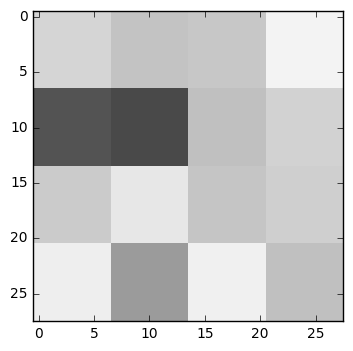

192.0

In [7]:
#test the data
rand_image = random.randint(0, 2560000)
print (rand_image)
plt.imshow(trainDataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (labelsTrainDataset[rand_image])
plt.show()
np.mean(trainDataset[rand_image])

In [8]:
# randomize the data
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(trainDataset, labelsTrainDataset)
test_dataset, test_labels = randomize(testDataset, labelsTestDataset)

1332399
146


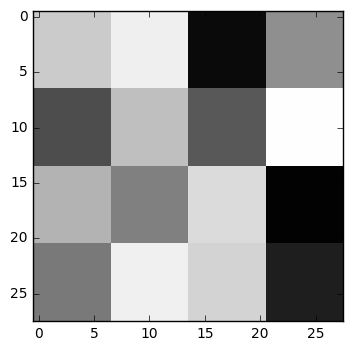

146.0

In [9]:
#test the data
rand_image = random.randint(0, 2560000)
print (rand_image)
plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
np.mean(train_dataset[rand_image])

14079
178


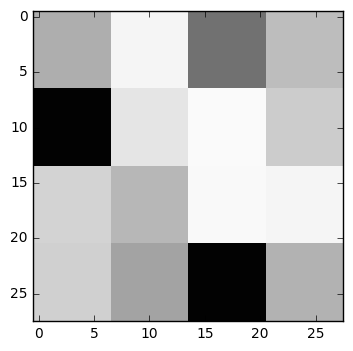

178.0

In [10]:
#test the data
rand_image = random.randint(0, 25600)
print (rand_image)
plt.imshow(test_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (test_labels[rand_image])
plt.show()
np.mean(test_dataset[rand_image])

In [11]:
# save the data
pickle_file = 'brightnessData.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [12]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 2037453142


In [13]:
#estimate the duplicates

all_data = pickle.load(open('brightnessData.pickle', 'rb'))

def count_duplicates(dataset1, dataset2):
    hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
    dup_indices = []
    for i in range(0, len(dataset2)):
        if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
            dup_indices.append(i)
    return len(dup_indices)


print(count_duplicates(all_data['test_dataset'], all_data['train_dataset']))

119825


In [23]:
# test a regression model

train_dataset = all_data['train_dataset']
train_labels = all_data['train_labels']
test_dataset = all_data['test_dataset']
test_labels = all_data['test_labels']

print (len(train_dataset))
print (len(train_labels))
print (len(test_dataset))
print (len(test_labels))

2560000
2560000
25600
25600


In [24]:

def get_score(train_dataset, train_labels, test_dataset, test_labels):
    model = LogisticRegression()
    train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
    test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
    model.fit(train_flatten_dataset, train_labels)

    return model.score([x.flatten() for x in test_dataset], test_labels)

print("100 trainsamples score: " + str(get_score(train_dataset[:100], train_labels[:100], test_dataset, test_labels)))
print("1000 trainsamples score: " + str(get_score(train_dataset[:1000], train_labels[:1000], test_dataset, test_labels)))
print("5000 trainsamples score: " + str(get_score(train_dataset[:5000], train_labels[:5000], test_dataset, test_labels)))
print("10000 trainsamples score: " + str(get_score(train_dataset[:10000], train_labels[:10000], test_dataset, test_labels)))


100 trainsamples score: 0.005625
1000 trainsamples score: 0.01703125
5000 trainsamples score: 0.028359375
10000 trainsamples score: 0.0316796875
